In [24]:
import san
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt

In [34]:
gold=quandl.get("LBMA/GOLD", start_date="2017-09-01")["USD (PM)"]
gold.index = gold.index.tz_localize('UTC')

In [35]:
btc = san.get('prices/bitcoin', from_date="2017-09-01")["priceUsd"]

In [36]:
prices = pd.concat([gold, btc], axis=1).dropna()

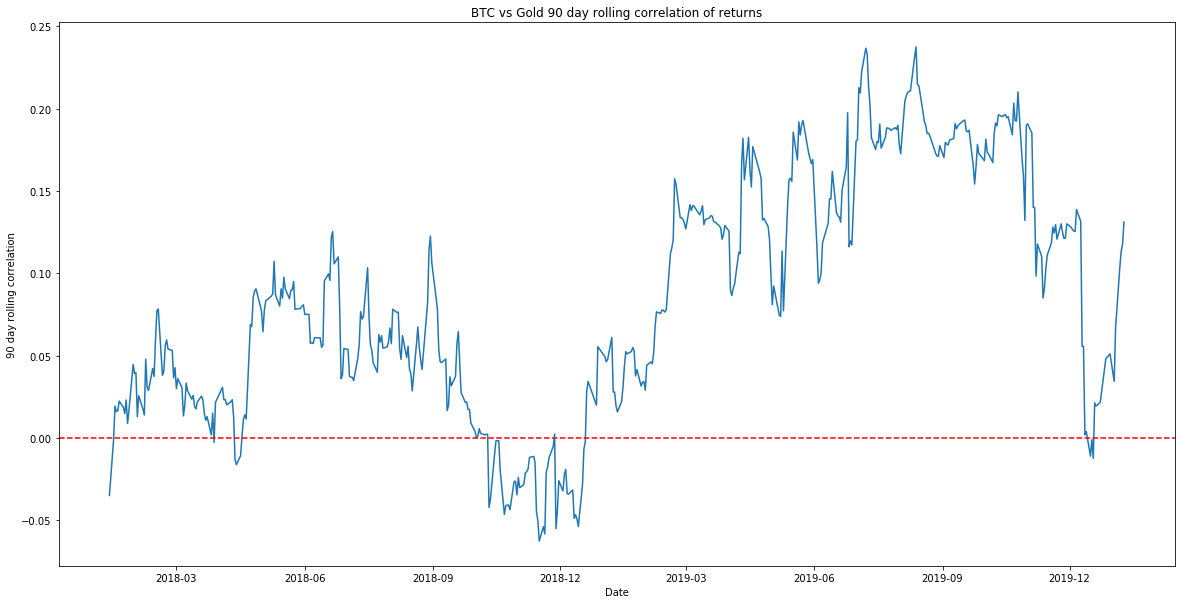

In [46]:
corr = prices["USD (PM)"].pct_change().rolling(90).corr(prices["priceUsd"].pct_change()).dropna()
plt.figure(figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("90 day rolling correlation")
plt.plot(corr)
plt.title("BTC vs Gold 90 day rolling correlation of returns")
plt.axhline(color="red",ls="--")
plt.show()

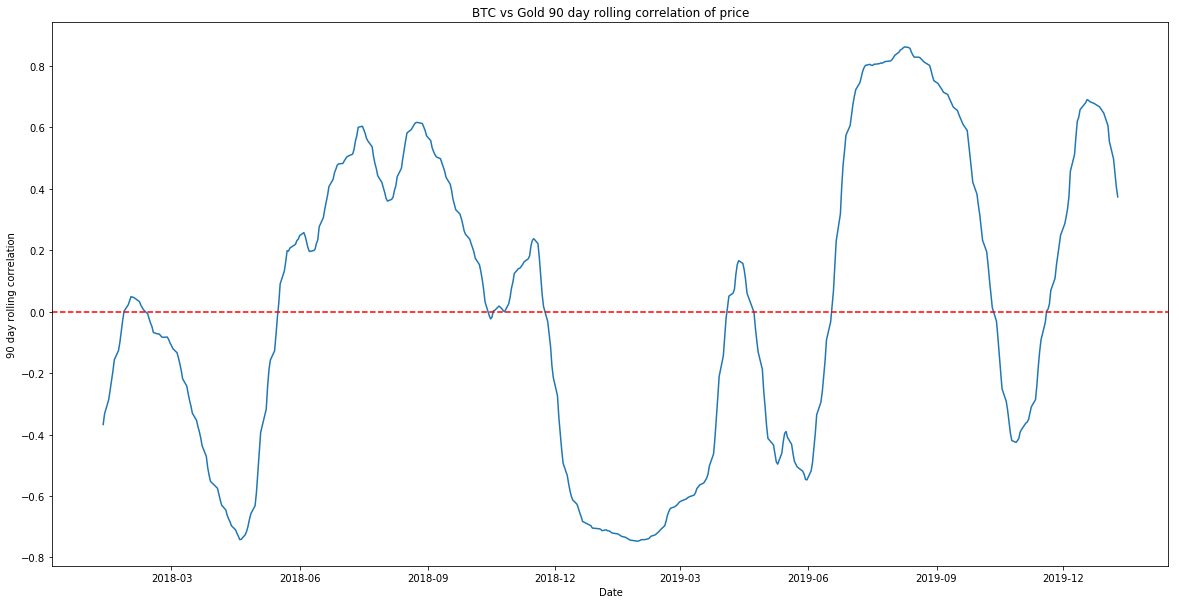

In [49]:
corr = prices["USD (PM)"].rolling(90).corr(prices["priceUsd"]).dropna()
plt.figure(figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("90 day rolling correlation")
plt.plot(corr)
plt.title("BTC vs Gold 90 day rolling correlation of price")
plt.axhline(color="red",ls="--")
plt.show()